# Lab 4 - PCA and Classification

## Objectives
In this lab, we will take a look of a few topics - 
- Using PCA for visualisation
- Employing PCA for classification tasks
- Implementing the power method for PCA

## Resources
- Lecture notes on Dimension Reduction
- Sklearn documentation page on PCA: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- Sklearn documentation on k-NN: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier 

## Part A. PCA and Visualization

In [212]:
# business as usual
import numpy as np
import matplotlib.pylab as pl
%matplotlib inline

We are to use a Bank Telemarketing dataset from the UCI Repository. The data set is for prediction on whether a client is likely to subscribe to a term deposit. More information can be found from URL https://archive.ics.uci.edu/ml/datasets/Bank+Marketing. 

For our purposes we have included only numerical attributes in a reduced dataset. Load it in:

In [213]:
bank=np.loadtxt('bank_new.txt')

In case the data is ordered (and our classifiers might be order-sensitive), we shuffle it before further experiments:

In [214]:
bank=np.random.permutation(bank)

We then separate the data attributes (first 10 columns) from the class labels (last column):

In [215]:
data=bank[:,0:-1]
label=bank[:,-1]

In [216]:
data.shape        # check on the dimensionality of data

(4334, 11)

To visualize the data sets, we construct two subsets according to the class labels, and choose two attributes to do a scatter plot, e.g., attributes 0 and 4:

In [217]:
# Get the subset indeces for class '0' and '1' respectively
sub0=label[:]==0
sub1=label[:]==1

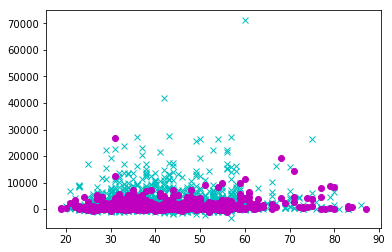

In [218]:
# Plot out the data using two attributes 
pl.plot(data[sub0,0],data[sub0,4],'cx')
pl.plot(data[sub1,0],data[sub1,4],'mo')

With 11 attributes, there are $11\times(11-1)/2=55$ options for a 2-attribute scatter plot. We may be lucky to hit on a good choice, but even that has the information of 9 other attributes left out.

Let's then consider using PCA and getting a linear projection of *all* attributes onto the first two principal components. 
We import the PCA module in Sklearn, and *fit and transform* the data to the first two PCs:

In [219]:
from sklearn.decomposition import PCA

In [220]:
pca=PCA(n_components=2)
x=pca.fit_transform(data)

x

array([[  268.72744934,  -243.24814487],
       [ -345.78336204,   141.66150729],
       [ -824.99787511,   223.06975141],
       ..., 
       [-1339.40520338,  -159.72979266],
       [ -894.29730815,   414.96342147],
       [-1368.41846753,  -151.77465435]])

How well do the two PCs *summarize* the data? We can print out the variance they have explained:

In [221]:
print(pca.explained_variance_ratio_)

[ 0.99146531  0.00742884]


Now, replot the plot using the two PCs - does it look better?

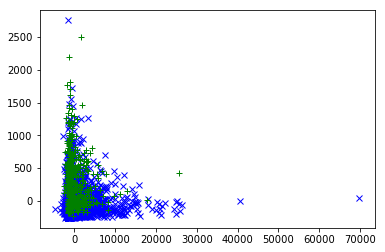

In [222]:
pl.plot(x[sub0,0],x[sub0,1],'bx')
pl.plot(x[sub1,0],x[sub1,1],'g+')

## Part B. Classification

For this part we will experiment with the k-NN classifier implemented in the Sklearn package.

In [223]:
from sklearn.neighbors import KNeighborsClassifier

The following lines start a "KNeighborsClassifier", fit it with the first 1000 entries of the dataset, and test it against the rest of the dataset, reporting an accuracy score:

In [224]:
neigh = KNeighborsClassifier(n_neighbors=3,weights='uniform')
neigh.fit(data[:1000], label[:1000])
neigh.score(data[1000:],label[1000:])

0.87492501499700059

In [225]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x[:1000], label[:1000])
neigh.score(x[1000:],label[1000:])

0.85482903419316136

One question we can ask is - how does the number of neighbours (k) affect the classification accuracy? 

**Task 1a**. Taking the same split of the 'data' array (first 1000 vs the rest) for training and testing, carry out k-NN classification using different $k$ (n_neighbors) values. Use a "for" loop to collect the performance data into a list; print out or display the list. 

Add another list to collect performance data using distance-based weighting for k-NN. From the two accuracy lists, generate two performance curves for comparison.

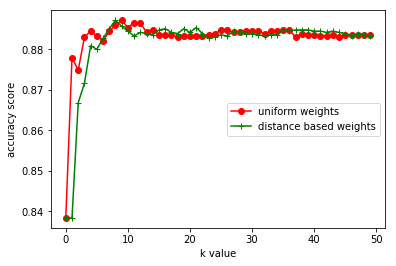

In [226]:
# your task1a code here

uniform_results = []
distance_results = []
k = 51


def print_results(x):
    for i in range(0, len(x)):
        print "k ", i+1 , " :" , x[i]

        
def run_knn_classifier(mode,kvalue,input_data,results):
    for i in range (1,kvalue):
        neigh = KNeighborsClassifier(n_neighbors=i,weights=mode)
        neigh.fit(input_data[:1000], label[:1000])
        results.append(neigh.score(input_data[1000:],label[1000:]))
    return results
    
        

uniform_results = run_knn_classifier('uniform',k,data,uniform_results)       
distance_results = run_knn_classifier('distance',k,data,distance_results)       

pl.plot(uniform_results,'-ro',label="uniform weights")
pl.plot(distance_results,'-g+',label='distance based weights')
pl.ylabel('accuracy score')
pl.xlabel('k value')
pl.legend(loc='center right')
pl.show()

**Task 1b**. Note that the 'x' array contains the 2-D PCA-transformed data. Carry out the same study as above for the dimension-reduced dataset. 

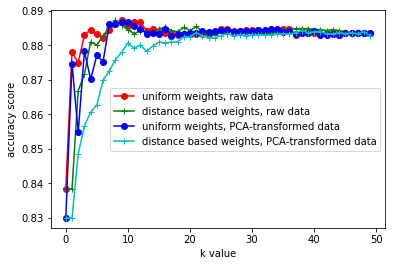

In [228]:
# your task1b code here
uniform_PCA_transformed = []
distance_PCA_transformed = []


uniform_PCA_transformed = run_knn_classifier('uniform',k,x,uniform_PCA_transformed)       
distance_PCA_transformed = run_knn_classifier('distance',k,x,distance_PCA_transformed)       


pl.plot(uniform_results,'-ro',label="uniform weights, raw data")
pl.plot(distance_results,'-g+',label='distance based weights, raw data')
pl.plot(uniform_PCA_transformed,'-bo',label="uniform weights, PCA-transformed data")
pl.plot(distance_PCA_transformed,'-c+',label='distance based weights, PCA-transformed data')
pl.ylabel('accuracy score')
pl.xlabel('k value')
pl.legend(loc='center right')
pl.show()


Comment on the findings from the classification experiments above:

Up to a threshold, as k increases the accuracy score increases. After that, the increase in accuracy smoothes out/converges to a similar value, around 0.885, regardless of increase in k value. The threshold is approximately k=10-15.

As a generalization, the accuracy of KNN and the number of k appear to have a logarithmic relationship. 

Comparing the different initialization against each other, it appears that in general, uniform weights perform better than distance-bases weights, for both raw data and dimension reduced/PCA transformed data. 

Over a high number of k-values, (eg, k=50), the accuracy score of the different initialization methods converges to a similar value, with the exception of using distance based weight initialization with PCA transformed data performing slightly worse than the other initialization methods. That said, all iterations converges eventually. 

<p><font color="red">**JD**: nice graph! Note I won't read too deep into the curves and suggest the accuracy follow a logarithmic relationship in terms of k... What's more important is that there's a range for good $k$ values, after that increasing $k$ may not help. Also, distance-based weighting for kNN may not work better (some times it does).</font>

## Part C. Power PCA

### Implementation

We can also conduct PCA using the power method. First we transform the data array into a matrix, which will make further operations easier:

In [180]:
X=np.matrix(data)
nr,dim=X.shape
print nr,dim

4334 11


We need to do some pre-processing on the raw data: making it zero-meaned:

In [181]:
m=np.mean(X,axis=0)
X-=m

Then we calculate the covariance matrix $R=X^TX/n$. Note its dimensionality.

In [182]:
R=X.T*X/nr
print 'Covar mat.'
print R

Covar mat.
[[  1.10337498e+02   3.27027129e+00  -1.33308102e+00  -2.22451489e-02
    2.71687501e+03  -1.01615243e+00  -2.08759193e-02  -1.26908051e+01
    1.20919596e-03  -1.27370826e+01  -1.68337667e-02]
 [  3.27027129e+00   7.59085234e-01  -9.94995836e-02  -3.17735364e-03
    1.32897089e+01   1.93622549e-02   1.39668974e-02  -8.51333187e+00
    5.36409613e-02  -2.16095749e+00  -3.88618641e-02]
 [ -1.33308102e+00  -9.94995836e-02   4.43886557e-01  -9.96509926e-04
    1.13485600e+02  -2.39758648e-02  -6.01206715e-03  -1.94341721e+00
    2.02536729e-02   7.67675514e-01   3.44681273e-02]
 [ -2.22451489e-02  -3.17735364e-03  -9.96509926e-04   1.65598569e-02
   -2.70921871e+01   2.98878445e-04   2.87932700e-03  -4.96939078e-01
   -5.05351596e-03  -3.23484329e-01  -5.70307348e-03]
 [  2.71687501e+03   1.32897089e+01   1.13485600e+02  -2.70921871e+01
    9.06169384e+06  -7.59308936e+01  -8.32773562e+01  -1.39459668e+04
   -7.63231191e+01   2.51159093e+03   1.17635841e+02]
 [ -1.01615243e+00 

We now initialize a column vector $\vec w$ (simply using an all-1), to be multiplied with $R$:

In [183]:
w=np.matrix(np.ones(dim)).T

In [184]:
# check on dimensionality
print R.shape,w.shape,dim

(11, 11) (11, 1) 11


**Run** the following iteration a number of times and see if the power iteration + normalization process converges or not:

In [188]:
w=R*w
norm=w.T*w
w/=np.sqrt(norm)
print w

[[  2.99824056e-04]
 [  1.46807374e-06]
 [  1.25239274e-05]
 [ -2.98966283e-06]
 [  9.99998714e-01]
 [ -8.37945042e-06]
 [ -9.18996967e-06]
 [ -1.55061092e-03]
 [ -8.41361043e-06]
 [  2.77444381e-04]
 [  1.29833343e-05]]


Now we can generate the first PC for the entire dataset X:

In [70]:
y1=X*w

To get the second eigenvector, one needs to deflate the correlation matrix $R$ with ${\vec w}$ (right now converged to the first eigenvector):

In [112]:
R=R-w*w.T*R


matrix([[ -1.14488906],
        [ -4.31613532],
        [  0.95113068],
        ..., 
        [ -8.95821978],
        [-14.23184837],
        [  5.6454795 ]])

What then? We can repeat the iterations using another initialized w. If w converges, you can stack it alongside the first w to make a transform matrix using numpy's hstack(). The projection on the 2-D dataset can be generated simply by 'y=X*W'. This our next task.

**Task 2**: Write a powerPCA(data, n_pcs) function, use it to derive the 1st and 2nd eigenvectors.  and test it by using the "Bank" data for visualisation.

Inputs: 
- data: raw data as a 2-D array
- n_pcs: number of principal components to be extracted

Procedure: 
1. Decentralize data
2. Get covariance matrix
3. Initialize w
4. Do power method iterations (e.g., 30 times) and get w (converged)
5. Assign transform matrix W=w
6. for other eigenvectors:
    repeat steps 3 and 4;
    hstack w to W
7. return X*W

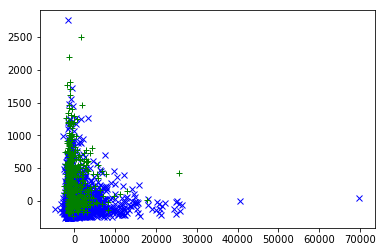

In [194]:
# your code (function definition, plus testing) here

def powerPCA(data, n_pcs):
    
    W=None  
    X=np.matrix(data)
    nr,dim=X.shape
    
    # data preprocessing
    m=np.mean(X,axis=0)
    X-=m
    
    # Compute covariance matrix, R
    R=X.T*X/nr
    
    # Power method iteration begins here
    for i in range(0,n_pcs):

        
        #initialize w
        w=np.matrix(np.ones(dim)).T   
        
        for j in range(0,30):
            w=R*w
            norm=w.T*w
            w/=np.sqrt(norm)
                  
        R=R-w*w.T*R
        
        if W is None:
            W = w
        else:
            W = np.hstack((W,w))
            

    return X*W
        
    
Y = powerPCA(data,2)


# Plot out the data using two attributes 
pl.plot(Y[sub0,0],Y[sub0,1],'bx')
pl.plot(Y[sub1,0],Y[sub1,1],'g+')


Your comments:



<p><font color="red">**JD**: Excellent work!

<p>**Mark: 95%**</font>